In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent,
    MotionSense_BalancedView20HZ,
    ExtraSensorySense_UnbalancedView20HZ,
    CHARM_BalancedView20Hz,
    WISDM_UnbalancedView20Hz,
    UCIHAR_UnbalancedView20Hz
)

2022-10-13 19:04:12.523773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-13 19:04:12.523793: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# WISDM Loader
loader = WISDM_UnbalancedView20Hz(
    "../../data/views/WISDM/unbalanced_20Hz_train_test-v1", 
    download=False
)

# Print the readme (optional)
loader.print_readme()

# Unbalanced WISDM View Resampled to 20Hz

This view contain only the train and test files for [WISDM dataset](https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset) (70% samples train and 30% test).
The dataset was sampled at 20Hz and interpolated using the cubic spline method due to non stable sampling.

## Activity codes
- 0: walking (2188 train, 0 validation, 886 test) 
- 1: jogging (2070 train, 0 validation, 887 test) 
- 2: stairs (2187 train, 0 validation, 827 test) 
- 3: sitting (2189 train, 0 validation, 886 test) 
- 4: standing (2189 train, 0 validation, 887 test) 
 

## Standartized activity codes
- 0: sit (2189 train, 0 validation, 886 test) 
- 1: stand (2189 train, 0 validation, 887 test) 
- 2: walk (2188 train, 0 validation, 886 test) 
- 5: run (2070 train, 0 validation, 887 test) 
- 6: stair up and down (2187 train, 0 validation, 827 test) 
      




In [5]:
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val.data['standard activity code'] = train_val.data['standard activity code'].astype('int')
train_val

PandasMultiModalDataset: samples=10823, features=360, no. window=6, label_columns='standard activity code'

In [6]:
train_val.data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59,activity code,user,standard activity code
0,-0.364761,-0.900995,1.988477,0.504245,-2.074267,-4.365631,-0.503460,1.585056,-0.192807,-1.778517,...,0.021654,-0.008257,-0.392786,-0.329143,-0.074698,-0.027220,0.314905,0,1600,2
1,0.081002,-0.059554,0.429260,1.072248,-2.011736,-4.792650,-2.087036,0.663866,0.317017,-1.504834,...,0.345166,0.294343,-0.417068,-0.172208,0.067521,0.406141,0.615971,0,1600,2
2,0.192588,-0.855499,-1.242746,0.316417,-1.833108,-4.946311,1.429507,1.555702,-1.230934,-2.758278,...,0.341863,0.039910,-0.253467,-0.607339,-0.102324,0.100644,0.608968,0,1600,2
3,1.506239,-1.887573,-0.375515,0.282729,-2.745547,-5.598461,-1.923976,1.519264,0.538521,-2.826598,...,0.408067,0.268658,-0.341150,-0.359142,-0.065309,-0.015974,0.365056,0,1600,2
4,-0.494237,-0.791543,0.976555,1.730751,-4.135104,-7.033570,-3.470397,-1.347896,0.434743,0.326745,...,-0.459501,0.421399,-0.182202,-0.406128,-0.590792,-0.174049,0.307581,0,1600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,-0.705972,-0.726914,-0.808348,-0.727646,-0.519297,-0.706294,-0.778460,-0.935760,-0.656630,-0.765051,...,0.015264,0.003391,-0.007575,0.000763,0.015584,-0.014311,-0.016027,4,1635,1
10819,-0.608502,-0.795883,-0.552300,-0.851302,-0.894535,-0.706040,-0.784716,-0.855779,-0.704870,-0.683281,...,-0.003144,-0.002943,0.005729,-0.010290,-0.006023,-0.006458,-0.001189,4,1635,1
10820,-0.777215,-0.714181,-0.765897,-0.765035,-0.697754,-0.852415,-0.749396,-0.637518,-0.757676,-0.702906,...,-0.001254,0.006774,-0.001247,0.001032,0.006439,0.005181,0.011468,4,1635,1
10821,-1.073461,-0.614644,-0.764390,-0.546810,-0.874834,-0.619953,-0.698473,-0.924804,-0.704255,-0.736017,...,0.004119,0.000570,-0.035448,-0.028324,0.004960,0.002800,-0.004581,4,1635,1


In [7]:
from librep.utils.workflow import SimpleTrainEvalWorkflow, MultiRunWorkflow
from librep.estimators import RandomForestClassifier
from librep.metrics.report import ClassificationReport
import yaml

reporter = ClassificationReport(use_accuracy=True, use_f1_score=True, use_classification_report=False, use_confusion_matrix=False, plot_confusion_matrix=False)
experiment = SimpleTrainEvalWorkflow(estimator=RandomForestClassifier, estimator_creation_kwags ={'n_estimators':100} , do_not_instantiate=False, do_fit=True, evaluator=reporter)
multi_run_experiment = MultiRunWorkflow(workflow=experiment, num_runs=3, debug=False)

In [8]:
# import numpy as np

# result = multi_run_experiment(train_val, test)

# averange = np.mean([result['runs'][i]['result'][0]['accuracy'] for i in range(3)])
# averange

In [9]:
from librep.datasets.multimodal import TransformMultiModalDataset

In [10]:
from librep.transforms.filter import ButterWorthFilter

filter_transform = ButterWorthFilter()
transformer = TransformMultiModalDataset(transforms=[filter_transform], new_window_name_prefix="filter.")

In [11]:
# train_val_filtered = transformer(train_val)
# test_filtered = transformer(test)

# result = multi_run_experiment(train_val_filtered, test_filtered)

# averange = np.mean([result['runs'][i]['result'][0]['accuracy'] for i in range(10)])
# averange

In [12]:
import numpy as np
X = np.array(train_val.data.iloc[:,:60])
sample = X[0]
np.mean(sample)

-0.8667934435512187

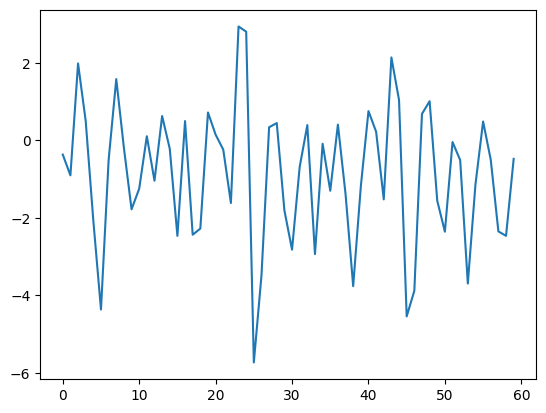

In [13]:
import matplotlib.pyplot as plt

plt.plot(sample)

In [14]:
from scipy import signal

sos = signal.butter(3, .3, 'high', fs=20, output='sos')
filtered = signal.sosfilt(sos, sample)
np.mean(filtered)

-0.0076676426580800615

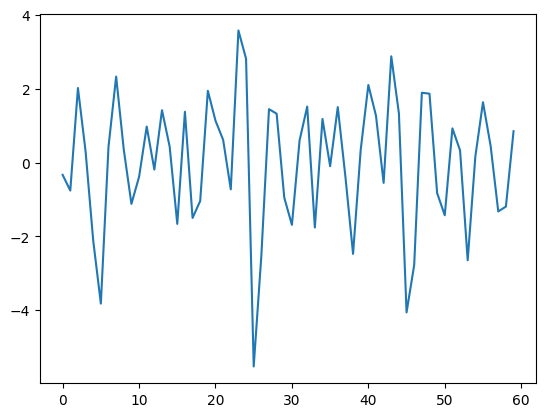

In [15]:
plt.plot(filtered)

In [17]:
from scipy import signal

sos = signal.butter(3, .3, 'low', fs=20, output='sos')
gravity = signal.sosfilt(sos, sample)
np.mean(gravity)

-0.4774898126014146

In [18]:
sam = sample - (filtered + gravity)

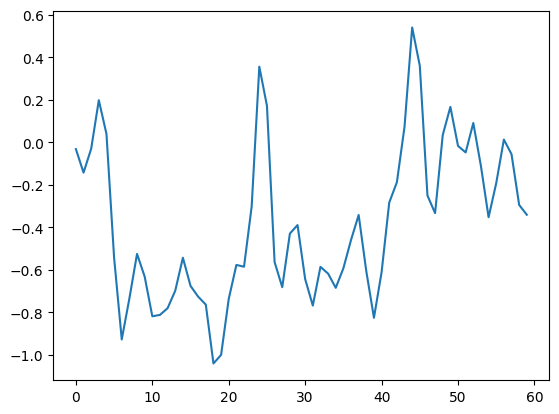

In [19]:
plt.plot(sam)